In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [27]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\penguin_data\cleaned_dataset_penguin.csv")

In [28]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,gender_MALE
0,0,39.1,18.7,181.0,3750.0,False,True,True
1,0,39.5,17.4,186.0,3800.0,False,True,False
2,0,40.3,18.0,195.0,3250.0,False,True,False
3,0,36.7,19.3,193.0,3450.0,False,True,False
4,0,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...,...
329,2,47.2,13.7,214.0,4925.0,False,False,False
330,2,46.8,14.3,215.0,4850.0,False,False,False
331,2,50.4,15.7,222.0,5750.0,False,False,True
332,2,45.2,14.8,212.0,5200.0,False,False,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    int64  
 1   culmen_length_mm   334 non-null    float64
 2   culmen_depth_mm    334 non-null    float64
 3   flipper_length_mm  334 non-null    float64
 4   body_mass_g        334 non-null    float64
 5   island_Dream       334 non-null    bool   
 6   island_Torgersen   334 non-null    bool   
 7   gender_MALE        334 non-null    bool   
dtypes: bool(3), float64(4), int64(1)
memory usage: 14.2 KB


In [30]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [31]:
df['species'].value_counts()

species
0    146
2    120
1     68
Name: count, dtype: int64

# X and y

In [32]:
X = df.drop('species', axis = 1)
y = df['species']

# Train_Test_Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train.iloc[ : , 1 : 5] = sc.fit_transform(X_train.iloc[:, 1 : 5])
X_test.iloc[: , 1: 5] = sc.transform(X_test.iloc[:, 1 : 5])

# Modelling


**Logistic regression(BaseLine model)**

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# Evaluation

**Train**

In [36]:
# Prediction
ypred_train = log_reg.predict(X_train)

# train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(y_train, ypred_train))

# cross alidation score
from sklearn.model_selection import cross_val_score
print("CV SCORE : ", cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = 'accuracy').mean())


Train Accuracy :  1.0
CV SCORE :  0.9924528301886791


**Test**

In [37]:
ypred_test = log_reg.predict(X_test)
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))


Test Accuracy :  1.0


# Confusion Metrics

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[25,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 29]], dtype=int64)

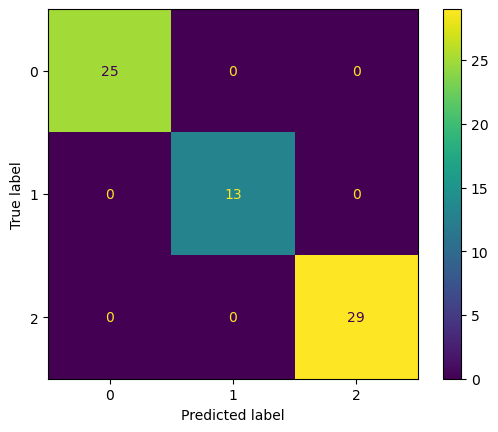

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = df['species'].unique()).plot()
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        29

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [41]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc= roc_auc).plot()
plt.show()

ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, ypred_test)